# MetaData

## Historical Data
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

## Data to predict 
Also attached here is `data_to_predict.json`, which provides the new data that you must predict on using the model you build. This data was generated similar to the `historical_data.csv` and it contains the same columns as above, except for the following differences:
  * This file does not contain `actual_delivery_time`, since that is unknown at the time of prediction
  * This file contains `delivery_id` as additional field
  * This file may contain other additional fields
Each row of the data is one data point to predict on. Note that `data_to_predict.json` contains orders from later weeks compared to `historical_data` 



In [1]:
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#This sets my working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\Data Science projects\DoorDash Code Interview")

In [3]:
#Verifies my working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\Data Science projects\\DoorDash Code Interview'

In [4]:
#Merging of data files: 1 Locate and store all the file names in the folder
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [5]:
all_filenames

['historical_data.csv', 'predict_data.csv']

In [6]:
history, prediction = [pd.read_csv(f, sep=",") for f in all_filenames ]

In [7]:
hist_train, pred_test = history,  prediction 
hist_train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [8]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   store_primary_category                        53435 non-null  object 
 4   order_protocol                                54495 non-null  float64
 5   total_items                                   54778 non-null  int64  
 6   subtotal                                      54778 non-null  int64  
 7   num_distinct_items                            54778 non-null  int64  
 8   min_item_price                                54778 non-null  int64  
 9   max_item_price                                54778 non-null 

# Exploratory Data Analyses

### This involves:
- Ensuring the factors/columns has the suitable data types;
- Identify categorical and continuous variables
- checking for levels of varibles with very few (arbitrarily choose 30) observations;
- Checking for and addressing missing values.
- cheking for and addressing outliers
- Matrix plots
- co-variation among predictors as well as with target variable.


*Plots will be done in both Tableau and python Seaborn

In [9]:
#Some columns in datetime format
hist_train1 = hist_train.copy()
hist_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [10]:
#Snapshot of the dataset
#Based on the unequal Non-null numbers we will need to address missing values.
hist_train1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [11]:
#Summary statistics
#I dont want format in exponents.
pd.options.display.float_format = '{:.4f}'.format
hist_train1.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.0000,197428.0000,196433.0000,197428.0000,197428.0000,197428.0000,197428.0000,197428.0000,181166.0000,181166.0000,181166.0000,197428.0000,196902.0000
mean,2.9787,3530.5103,2.8824,3.1964,2682.3314,2.6708,686.2185,1159.5886,44.8081,41.7397,58.0501,308.5602,545.3589
std,1.5249,2053.4967,1.5038,2.6665,1823.0937,1.6303,522.0386,558.4114,34.5268,32.1457,52.6618,90.1397,219.3529
min,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,-86.0000,0.0000,-4.0000,-5.0000,-6.0000,0.0000,0.0000
25%,2.0000,1686.0000,1.0000,2.0000,1400.0000,1.0000,299.0000,800.0000,17.0000,15.0000,17.0000,251.0000,382.0000
50%,3.0000,3592.0000,3.0000,3.0000,2200.0000,2.0000,595.0000,1095.0000,37.0000,34.0000,41.0000,251.0000,544.0000
75%,4.0000,5299.0000,4.0000,4.0000,3395.0000,3.0000,949.0000,1395.0000,65.0000,62.0000,85.0000,446.0000,702.0000
max,6.0000,6987.0000,7.0000,411.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000


# Comments on initial snoop:
- Date variables are in object data type. They will be converted to datetime dtypes as the case may be while others will be converted to categorical and numerical.
- Based on unique() I will select the categorical variables and convert their dtypes
- Based on interquartile ranges, min and max, there is a lot of outliers in most of the variables. 
    - I will come back to them.
- More on the dataset. I need to confirm the number of unique counts for some variables:
    - any categorical level with few instances e.g. counts will be merged as 'others'.
- Most ML algorithms will not process string values to categorical levels will eventually be coded as numeric. Their corresponding labels can be easily referred to in the raw set.
    
- .head() reveals some NaN/Missign values in Store_Primary_Cat
- Many other data isues exist here.

_note that EDA was an iterative process with back-and-forth process. Therefore there is no logical start and end of an an EDA section

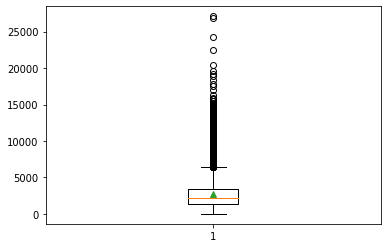

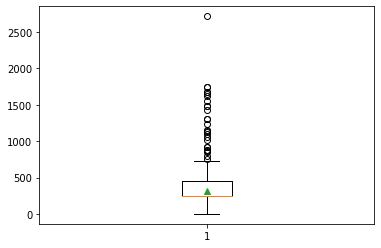

C:\Users\olani\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\olani\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\olani\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\olani\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


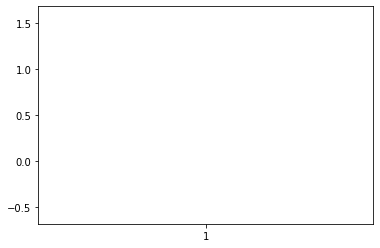

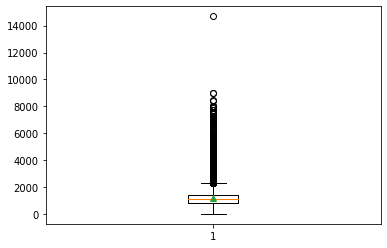

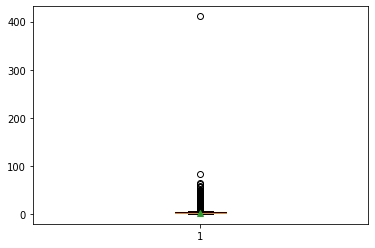

In [12]:
# Creating boxplot as a sample view of outliers.

names = ["subtotal", "estimated_order_place_duration", "estimated_store_to_consumer_driving_duration", "max_item_price", "total_items"]
for i in names:
    
    plt.boxplot(hist_train1.loc[:, i], showmeans=True) 
  
# show plot 
    plt.show() 

In [13]:
#From the describe output and a few of the boxplots there ae significant outliers that need to addressed
#percentage of instances that have that outlier.
#I could set them as np.nan and drop them later. We will see.
len(hist_train1[(hist_train1["subtotal"]>10000)])/len(hist_train1)

0.007663553295378568

# Feature Engineering and Data Preprocessing

Following EDA variables will now be 'cleaned', re-created, moved, recoded, scaled etc in preparation for model fitting.

### DateTime features

The target variable is a timedelta of difference between created_at and actual_delivery_time

In [14]:
hist_train1["created_at"]=pd.to_datetime(hist_train1["created_at"])

In [15]:
hist_train1["actual_delivery_time"]=pd.to_datetime(hist_train1["actual_delivery_time"])

In [16]:
hist_train1["delivery_duration"] = hist_train1["actual_delivery_time"]-hist_train1["created_at"]

In [17]:
#Convert the duration to seconds
hist_train1["delivery_duration"] = hist_train1["delivery_duration"].dt.total_seconds() 

In [18]:
#Create a day of the variable as a predictor. Maybe there is a trend in that attribute.
hist_train1['created_at_wk_day'] = hist_train1['created_at'].dt.dayofweek

In [19]:
hist_train1['created_at_wk_day'] = hist_train1['created_at_wk_day'].astype('category')

In [20]:
#write to file for use in tableau
#hist_train1_new.to_csv( "hist_train1_new.csv", encoding='utf-8-sig')

## Figure 1:EDA plots in Tableau
In Tableau, I could generate plots without wrangling the data. I just needed to use the Filter functions to subset the data accordingly. For instance, I used this feature to exclude NAs and extreme outliers.


<img scrc=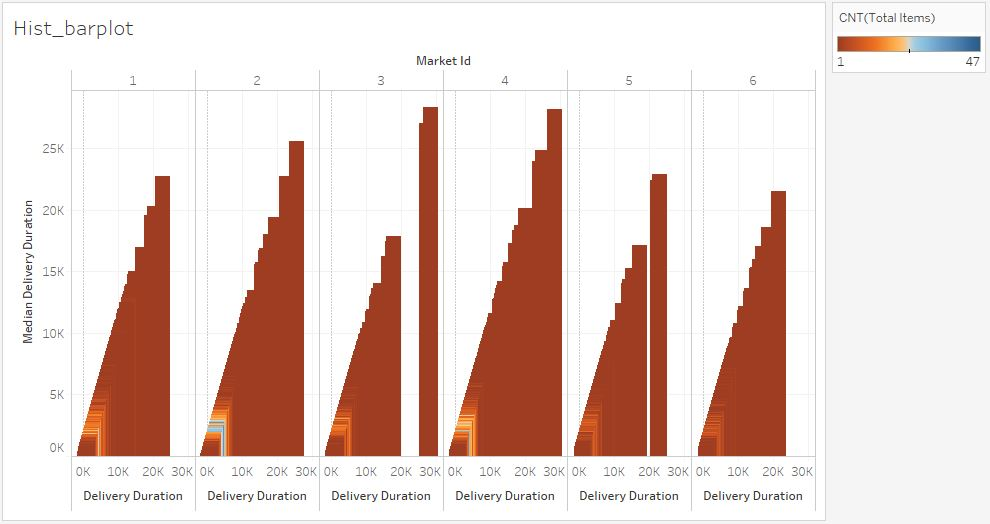 width="800" height="200>

## Figure 2: More EDA plots in Tableau

The Duration was plotted on a logrithm scale to better see the distribution.

<img scrc=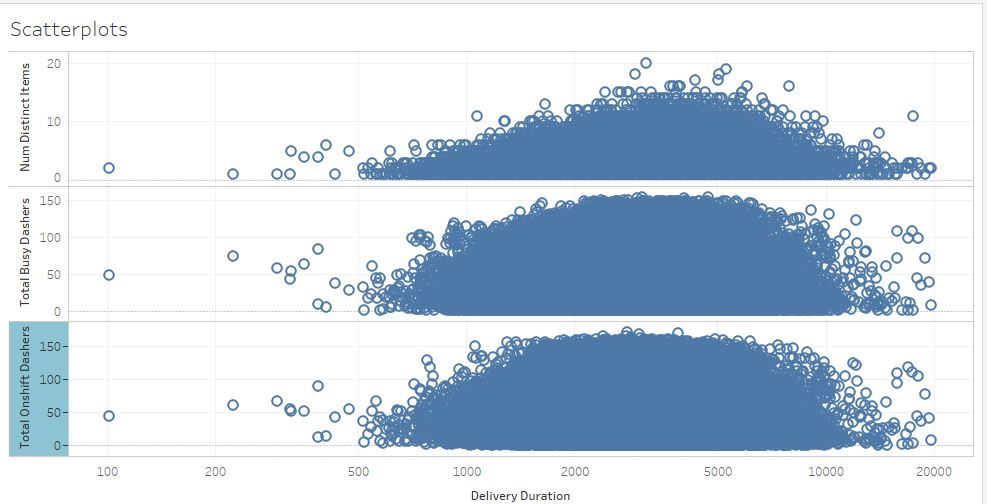 width="800" height="200>                                                                                       

## Comments

The skewness in this response variable is one of the best cases for scale a variable. We can use either min-max scaler (normalization) of z-score type standardization. 
I prefer the z-score standardization uses the mean of the variable. Min-max measures are sympathetic to outliers and severe skewness in the dataset. This is obvious in the Delivery Duration shown above. 
Normally, it is not very required for a decision tree classifier/regressor but we will do it anyways because of other mode algorithms.

### From the plots above:

- I plotted the median because the mean is subject to influence by outlier. Median also represents a center of distribution
- There is no significant difference in the delivery times for marketIDs
- Most ordered items occurred on MarketID 2 while the least occurred on MarketID 6
- The scatterplot between duration (plotted on a log axis) and three perceived important predictors does not reveal a linear relationship but a sort of parabolic pattermn. So a linear regression on the raw data may not help much.
- We will be transforming target/response variable (duration). These plotted predictors will not be transformed (except OHE'd) because they are categorical. 


### Categorical features

Some categorical variables have levels with very few observations that will not be contributiing much to the model. I will recode them into 'other' level prior to using One Hot Encoding. I can easily do this in R but since I will be using Sci-Kit learn I need to find out how to do this in python.

- The unique levels of Store_Primary_Category contain 'None' which has valid values in other attributes so it is retained in the data set.
- change the store_primary_category to category.
- remove columns that have been recreated.

In [21]:
#Distinct count of level numbers. 
uniq_check = hist_train1["store_primary_category"].value_counts()
uniq_check

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
alcohol-plus-food        1
chocolate                1
Name: store_primary_category, Length: 74, dtype: int64

In [22]:
#Store primary cat attribute has 74 levels and many of them have few observations (<100).
#Normal is well above 10000. 
#Creates a copy of the "store_primary_category" for recode

hist_train1["store_pri_cat_recode"] =hist_train1["store_primary_category"].copy()

In [23]:
#This (generic) loop iterates over columns of the dataframe. For each specified column, it applies the value_counts().
#It uses the condition to map for mapping
#the created mask is used to check that condition for specificied columns in if else condition.

hist_train2=hist_train1.copy().apply(lambda x:x.mask(x.map(x.value_counts())<400,"other") if x.name == "store_pri_cat_recode" else x)

In [24]:
#Unique counts output is converted to frame for easy access.
uniq_check2 =hist_train2["store_pri_cat_recode"].value_counts().to_frame()


In [25]:
#Now other has 8252
len(uniq_check2)

38

In [26]:
uniq_check2.loc["other"]

store_pri_cat_recode    8252
Name: other, dtype: int64

In [27]:
#Sanity check to ensure the the mapping was NOT applied to other variables.
hist_train2["estimated_store_to_consumer_driving_duration"].value_counts()

549.0000     386
512.0000     385
590.0000     375
603.0000     373
563.0000     368
            ... 
1525.0000      1
1336.0000      1
1299.0000      1
1407.0000      1
1275.0000      1
Name: estimated_store_to_consumer_driving_duration, Length: 1336, dtype: int64

In [28]:
#obtain list of columns
list(hist_train2)

['market_id',
 'created_at',
 'actual_delivery_time',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration',
 'delivery_duration',
 'created_at_wk_day',
 'store_pri_cat_recode']

In [29]:
hist_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [30]:
#columns to convert to categorical data type
var_cat = ["market_id","order_protocol", "store_id", "store_pri_cat_recode"]

In [31]:
#worked great
for i in var_cat:
    hist_train2.loc[:,i] = hist_train2.loc[:,i].astype("category")

In [32]:
#Confirm
hist_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  category      
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  category      
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  category      
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

### Numerical Data

In [33]:
hist_train2.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,197428.0000,197428.0000,197428.0000,197428.0000,197428.0000,181166.0000,181166.0000,181166.0000,197428.0000,196902.0000,197421.0000
mean,3.1964,2682.3314,2.6708,686.2185,1159.5886,44.8081,41.7397,58.0501,308.5602,545.3589,2908.4052
std,2.6665,1823.0937,1.6303,522.0386,558.4114,34.5268,32.1457,52.6618,90.1397,219.3529,19229.5250
min,1.0000,0.0000,1.0000,-86.0000,0.0000,-4.0000,-5.0000,-6.0000,0.0000,0.0000,120.0000
25%,2.0000,1400.0000,1.0000,299.0000,800.0000,17.0000,15.0000,17.0000,251.0000,382.0000,2100.0000
50%,3.0000,2200.0000,2.0000,595.0000,1095.0000,37.0000,34.0000,41.0000,251.0000,544.0000,2640.0000
75%,4.0000,3395.0000,3.0000,949.0000,1395.0000,65.0000,62.0000,85.0000,446.0000,702.0000,3360.0000
max,411.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000,8516820.0000


Looking at the summary statistics, some outliers/abnormal values were observed:

- 'total_onshift_dashers',  'market_id, order_protocol', 'total_onshift_dashers', 
'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'delivery_duration' 	should have minimum number > 1 but they a very very large unrealistic number. 

Should I remove the entire row or just recode the affected value in respective column? I will check the number of instances affected.

In [34]:
#outlier= 3Sigma = 99.7%of the data
hist_train_num= ['num_distinct_items', 'subtotal', 'total_items', 'max_item_price', 'min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'delivery_duration']
len(hist_train_num)


11

#### Outliers
By discrection I consider outlier to be any instance beyond 3 Sigma. This will cover 99.7% of the data.
The large size of the data set makes this decision justified

In [35]:
from numpy import std
from numpy import mean

In [36]:
#Checkpoint
hist_train3 = hist_train2.copy()
hist_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  category      
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  category      
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  category      
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [37]:
#Values below zero are assumed to input errors and should be removed in this case.
s = (hist_train3['min_item_price'] <= 0)

In [38]:
hist_train3.loc[s, 'min_item_price'] = np.nan

In [39]:
hist_train3.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,197428.0000,197428.0000,197428.0000,194876.0000,197428.0000,181166.0000,181166.0000,181166.0000,197428.0000,196902.0000,197421.0000
mean,3.1964,2682.3314,2.6708,695.2068,1159.5886,44.8081,41.7397,58.0501,308.5602,545.3589,2908.4052
std,2.6665,1823.0937,1.6303,519.4641,558.4114,34.5268,32.1457,52.6618,90.1397,219.3529,19229.5250
min,1.0000,0.0000,1.0000,1.0000,0.0000,-4.0000,-5.0000,-6.0000,0.0000,0.0000,120.0000
25%,2.0000,1400.0000,1.0000,300.0000,800.0000,17.0000,15.0000,17.0000,251.0000,382.0000,2100.0000
50%,3.0000,2200.0000,2.0000,599.0000,1095.0000,37.0000,34.0000,41.0000,251.0000,544.0000,2640.0000
75%,4.0000,3395.0000,3.0000,950.0000,1395.0000,65.0000,62.0000,85.0000,446.0000,702.0000,3360.0000
max,411.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000,8516820.0000


In [40]:
hist_train3['min_item_price'].isnull().sum()

2552

In [41]:

for i in list(hist_train_num):
    # count number of rows with less or equal to zero values
    #it is unreasonable to have zero in thoe attributes.
    s = (hist_train3[i] <= 0)
    hist_train3.loc[s, i] = np.nan
    

In [42]:
hist_train3.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,197428.0000,197249.0000,197428.0000,194876.0000,197421.0000,177530.0000,176974.0000,177011.0000,197334.0000,196893.0000,197421.0000
mean,3.1964,2684.7656,2.6708,695.2068,1159.6297,45.7260,42.7287,59.4134,308.7072,545.3839,2908.4052
std,2.6665,1822.1283,1.6303,519.4641,558.3786,34.2714,31.8679,52.5102,89.9091,219.3269,19229.5250
min,1.0000,12.0000,1.0000,1.0000,52.0000,1.0000,1.0000,1.0000,3.0000,1.0000,120.0000
25%,2.0000,1401.0000,1.0000,300.0000,800.0000,18.0000,16.0000,18.0000,251.0000,382.0000,2100.0000
50%,3.0000,2200.0000,2.0000,599.0000,1095.0000,38.0000,36.0000,42.0000,251.0000,544.0000,2640.0000
75%,4.0000,3396.0000,3.0000,950.0000,1395.0000,66.0000,63.0000,86.0000,446.0000,702.0000,3360.0000
max,411.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000,8516820.0000


In [43]:
hist_train3['total_onshift_dashers'].isnull().sum()

19898

In [44]:
hist_train3.shape[0]

197428

In [45]:
#Outrageous number in delivery duration now removed.
hist_train3.loc[:, "delivery_duration"] = hist_train3.loc[:, "delivery_duration"].replace(8516859.0000,np.nan)

In [46]:
#outlier= 3Sigma = 99.7%of the data
hist_train_num= ['num_distinct_items', 'subtotal', 'total_items', 'max_item_price', 'min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'delivery_duration']
len(hist_train_num)


11

In [47]:
for i in list(hist_train3.columns):
    # count number of rows with missing values
    n_miss = hist_train3[i].isnull().sum()
    perc = n_miss / hist_train3.shape[0] * 100
    print('{0}: missing= {1}, perc= {2}'.format(i, n_miss, perc))
    
#display column with missing values.
#About 3 attributes each have about 10% missing values.Others are <<<1%

market_id: missing= 987, perc= 0.49992908807261377
created_at: missing= 0, perc= 0.0
actual_delivery_time: missing= 7, perc= 0.0035455963693093178
store_id: missing= 0, perc= 0.0
store_primary_category: missing= 4760, perc= 2.411005531130336
order_protocol: missing= 995, perc= 0.5039811982089674
total_items: missing= 0, perc= 0.0
subtotal: missing= 179, perc= 0.0906659643009097
num_distinct_items: missing= 0, perc= 0.0
min_item_price: missing= 2552, perc= 1.2926231334967684
max_item_price: missing= 7, perc= 0.0035455963693093178
total_onshift_dashers: missing= 19898, perc= 10.078610936645257
total_busy_dashers: missing= 20454, perc= 10.360232591121827
total_outstanding_orders: missing= 20417, perc= 10.341491581741192
estimated_order_place_duration: missing= 94, perc= 0.047612294102153695
estimated_store_to_consumer_driving_duration: missing= 535, perc= 0.2709848653686407
delivery_duration: missing= 7, perc= 0.0035455963693093178
created_at_wk_day: missing= 0, perc= 0.0
store_pri_cat_re

In [84]:
#checkpoint re-assign df
hist_train5 = hist_train3.copy()

In [85]:
hist_train5.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,197428.0000,197249.0000,197428.0000,194876.0000,197421.0000,177530.0000,176974.0000,177011.0000,197334.0000,196893.0000,197421.0000
mean,3.1964,2684.7656,2.6708,695.2068,1159.6297,45.7260,42.7287,59.4134,308.7072,545.3839,2908.4052
std,2.6665,1822.1283,1.6303,519.4641,558.3786,34.2714,31.8679,52.5102,89.9091,219.3269,19229.5250
min,1.0000,12.0000,1.0000,1.0000,52.0000,1.0000,1.0000,1.0000,3.0000,1.0000,120.0000
25%,2.0000,1401.0000,1.0000,300.0000,800.0000,18.0000,16.0000,18.0000,251.0000,382.0000,2100.0000
50%,3.0000,2200.0000,2.0000,599.0000,1095.0000,38.0000,36.0000,42.0000,251.0000,544.0000,2640.0000
75%,4.0000,3396.0000,3.0000,950.0000,1395.0000,66.0000,63.0000,86.0000,446.0000,702.0000,3360.0000
max,411.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000,8516820.0000


In [86]:
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  category      
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  category      
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  category      
 6   total_items                                   197428 non-null  float64       
 7   subtotal                                      197249 non-null  float64       
 8   num_distinct_items                            197428 n

## Handling NAs

- Option 1: Dropna(). Given my relatively large dataset, losing about <10% to NAs is not too bad.
- Option 2:
Oh no, but wait we can fill some of the significant NAs with median of the attribute.
So any attribute with > 9% NAs will get carefully filled with median. This is discretionary.
- Dropna for the rest.

In [87]:
median=hist_train5['total_busy_dashers'].median()

In [88]:
hist_train5['total_busy_dashers'].fillna(median, inplace=True)

In [89]:
median2=hist_train5['total_outstanding_orders'].median()

In [90]:
hist_train5['total_outstanding_orders'].fillna(median2, inplace=True)

In [91]:
median3=hist_train5['total_onshift_dashers'].median()

In [92]:
hist_train5['total_onshift_dashers'].fillna(median3, inplace=True)

In [93]:
for i in list(hist_train5.columns):
    # count number of rows with missing values
    n_miss = hist_train5[i].isnull().sum()
    perc = n_miss / hist_train5.shape[0] * 100
    print('{0}: missing= {1}, perc= {2}'.format(i, n_miss, perc))
    
#display column with missing values.

market_id: missing= 987, perc= 0.49992908807261377
created_at: missing= 0, perc= 0.0
actual_delivery_time: missing= 7, perc= 0.0035455963693093178
store_id: missing= 0, perc= 0.0
store_primary_category: missing= 4760, perc= 2.411005531130336
order_protocol: missing= 995, perc= 0.5039811982089674
total_items: missing= 0, perc= 0.0
subtotal: missing= 179, perc= 0.0906659643009097
num_distinct_items: missing= 0, perc= 0.0
min_item_price: missing= 2552, perc= 1.2926231334967684
max_item_price: missing= 7, perc= 0.0035455963693093178
total_onshift_dashers: missing= 0, perc= 0.0
total_busy_dashers: missing= 0, perc= 0.0
total_outstanding_orders: missing= 0, perc= 0.0
estimated_order_place_duration: missing= 94, perc= 0.047612294102153695
estimated_store_to_consumer_driving_duration: missing= 535, perc= 0.2709848653686407
delivery_duration: missing= 7, perc= 0.0035455963693093178
created_at_wk_day: missing= 0, perc= 0.0
store_pri_cat_recode: missing= 4760, perc= 2.411005531130336


In [94]:
# drop rows with missing values,
#worked great
hist_train5.dropna(inplace=True)

In [95]:
#We lost just 4.5% of the dataset which is not much.
#If the potential value to be lost is going to much we could have imputed some statistical values instead of removing.
#And we have a large data set.
percent_lost = (hist_train5.shape[0]/hist_train2.shape[0])
percent_lost

0.955421723362441

In [96]:
hist_train5.shape

(188627, 19)

In [97]:
hist_train5.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000,188627.0000
mean,3.1088,2686.9782,2.6447,694.8161,1162.1164,45.1366,42.2192,57.9068,307.9421,546.3164,2910.7299
std,2.2305,1820.5437,1.6120,517.8207,553.3245,32.6397,30.2970,50.1507,89.5009,219.3895,19671.1551
min,1.0000,95.0000,1.0000,1.0000,60.0000,1.0000,1.0000,1.0000,3.0000,1.0000,120.0000
25%,2.0000,1412.0000,1.0000,300.0000,800.0000,20.0000,18.0000,21.0000,251.0000,383.0000,2100.0000
50%,3.0000,2205.0000,2.0000,599.0000,1095.0000,38.0000,36.0000,42.0000,251.0000,545.0000,2640.0000
75%,4.0000,3397.0000,3.0000,950.0000,1395.0000,62.0000,60.0000,80.0000,446.0000,703.0000,3360.0000
max,48.0000,27100.0000,20.0000,14700.0000,14700.0000,171.0000,154.0000,285.0000,2715.0000,2088.0000,8516820.0000


In [98]:
#Outrageous number in delivery duration now removed.
hist_train5.loc[:, "delivery_duration"] = hist_train5.loc[:, "delivery_duration"].replace(373879.0000,np.nan)

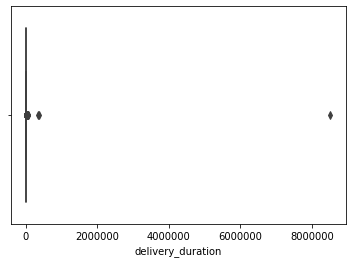

In [99]:
#Some very heavy highly influential outliers are in delivery_duration.very few though.
sns.boxplot('delivery_duration', data = hist_train5)

In [100]:
#Values below zero are assumed to input errors and should be removed in this case.
s = (hist_train5['delivery_duration'] > 300000)

In [101]:
hist_train5.loc[s, 'delivery_duration'] = np.nan

In [102]:
#Getting the correlation matrix for the dataset
corr_matrix = hist_train5.corr()
corr_matrix

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
total_items,1.0000,0.6848,0.8641,-0.4280,-0.0274,0.0489,0.0445,0.0513,-0.0096,0.0206,0.1389
subtotal,0.6848,1.0000,0.6956,0.0346,0.5052,0.1279,0.1218,0.1268,0.0351,0.0331,0.2035
num_distinct_items,0.8641,0.6956,1.0000,-0.4425,0.0535,0.0701,0.0644,0.0712,0.0069,0.0275,0.1510
min_item_price,-0.4280,0.0346,-0.4425,1.0000,0.5491,0.0367,0.0377,0.0351,0.0496,-0.0006,0.0142
max_item_price,-0.0274,0.5052,0.0535,0.5491,1.0000,0.1263,0.1232,0.1233,0.0815,0.0242,0.1257
total_onshift_dashers,0.0489,0.1279,0.0701,0.0367,0.1263,1.0000,0.9397,0.9323,-0.1792,0.0441,0.0767
total_busy_dashers,0.0445,0.1218,0.0644,0.0377,0.1232,0.9397,1.0000,0.9294,-0.1838,0.0424,0.0946
total_outstanding_orders,0.0513,0.1268,0.0712,0.0351,0.1233,0.9323,0.9294,1.0000,-0.1649,0.0378,0.1749
estimated_order_place_duration,-0.0096,0.0351,0.0069,0.0496,0.0815,-0.1792,-0.1838,-0.1649,1.0000,-0.0267,0.0965
estimated_store_to_consumer_driving_duration,0.0206,0.0331,0.0275,-0.0006,0.0242,0.0441,0.0424,0.0378,-0.0267,1.0000,0.2231


### Correlation matrix. 
- Looking at the last row:
    - the best linear correlation we had are just 3 attributes with only 0.20. The remaining ones are much much weaker

## Figure 4
<img scrc=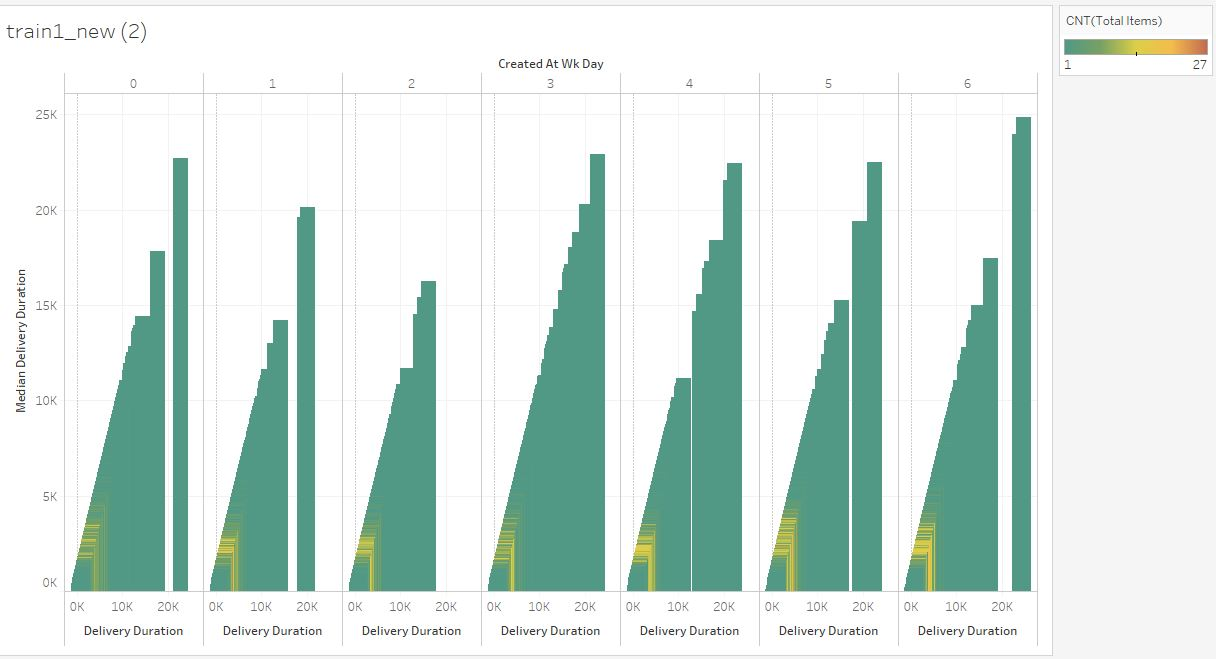 width="800" height="200>

## Figure 5
<img scrc=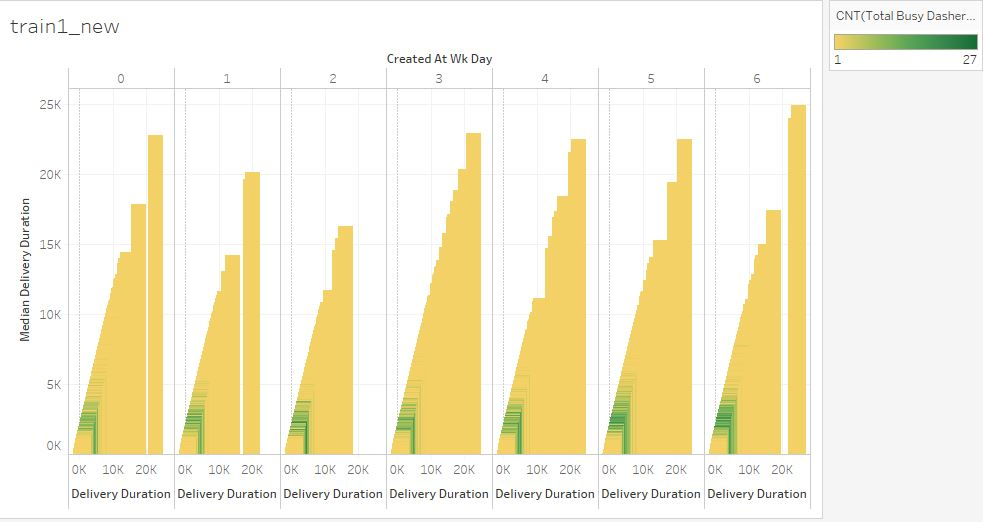 width="800" height="200>

## Comment on week day plot:

- from the plots (Figures 5 and 6):
    - Week day Monday to Sunday = 0 to 6.
    
- In general there is no significant between delivery duration (response) and the day of the week. However:
- Duration is slightly longer on Saturdays and Sundays despite having more Total busy dashers
- The duration is lower when Total Busy Dashers are higher. This is logical because more dashers are available to deliver orders. 
- There are more Total Busy Dashers when Total items ordered are higher. I am not sure which variable is responsible for which.

In [103]:
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     188627 non-null  category      
 1   created_at                                    188627 non-null  datetime64[ns]
 2   actual_delivery_time                          188627 non-null  datetime64[ns]
 3   store_id                                      188627 non-null  category      
 4   store_primary_category                        188627 non-null  object        
 5   order_protocol                                188627 non-null  category      
 6   total_items                                   188627 non-null  float64       
 7   subtotal                                      188627 non-null  float64       
 8   num_distinct_items                            188627 n

In [104]:
#move target to the end.
hist_train5["delivery_time_duration"] = hist_train5["delivery_duration"].copy()

In [105]:
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 20 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     188627 non-null  category      
 1   created_at                                    188627 non-null  datetime64[ns]
 2   actual_delivery_time                          188627 non-null  datetime64[ns]
 3   store_id                                      188627 non-null  category      
 4   store_primary_category                        188627 non-null  object        
 5   order_protocol                                188627 non-null  category      
 6   total_items                                   188627 non-null  float64       
 7   subtotal                                      188627 non-null  float64       
 8   num_distinct_items                            188627 n

In [106]:
#Remove columns that are recoded.
hist_train5.drop(columns=['delivery_duration', 'store_primary_category', 'created_at', 'actual_delivery_time'], inplace =True)

In [107]:
#Clean dataset without NAs and zeros.
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [108]:
(hist_train5['store_pri_cat_recode'].value_counts())

american          19124
pizza             17115
mexican           16776
burger            10846
sandwich           9905
chinese            9318
japanese           9066
dessert            8652
other              8148
indian             7254
thai               7123
italian            6888
fast               6061
vietnamese         6034
mediterranean      5448
breakfast          5338
salad              3696
greek              3293
seafood            2689
barbecue           2680
asian              2410
cafe               2191
sushi              2163
alcohol            1807
korean             1799
smoothie           1631
catering           1613
hawaiian           1481
middle-eastern     1478
dim-sum            1095
steak              1048
vegetarian          835
burmese             810
pasta               621
persian             597
french              566
bubble-tea          517
latin-american      511
Name: store_pri_cat_recode, dtype: int64

In [109]:
hist_train5['store_pri_cat_recode'].values.codes

array([ 1, 23, 17, ..., 13, 30, 30], dtype=int8)

In [110]:
#I realized that most ML models were not working with strings so represented my categorical levels as numeric codes
hist_train5['store_pri_cat_recode_num'] = hist_train4_new1.store_pri_cat_recode.copy().astype("category").cat.codes

In [111]:
hist_train5['store_pri_cat_recode_num'].value_counts()

1     19124
28    17115
23    16776
6     10846
30     9905
10     9318
19     9066
11     8652
25     8148
17     7254
35     7123
18     6888
13     6061
37     6034
22     5448
4      5338
29     3696
15     3293
31     2689
3      2680
2      2410
8      2191
34     2163
0      1807
20     1799
32     1631
9      1613
16     1481
24     1478
12     1095
33     1048
36      835
7       810
26      621
27      597
14      566
5       517
21      511
Name: store_pri_cat_recode_num, dtype: int64

In [112]:
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [113]:
hist_train5.head(n=50)

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_wk_day,store_pri_cat_recode,delivery_time_duration,store_pri_cat_recode_num
0,1.0000,1845,1.0000,4.0000,3441.0000,4.0000,557.0000,1239.0000,33.0000,14.0000,21.0000,446.0000,861.0000,4,american,3780.0000,1
1,2.0000,5477,2.0000,1.0000,1900.0000,1.0000,1400.0000,1400.0000,1.0000,2.0000,2.0000,446.0000,690.0000,1,mexican,4020.0000,23
8,2.0000,5477,3.0000,4.0000,4771.0000,3.0000,820.0000,1604.0000,8.0000,6.0000,18.0000,446.0000,289.0000,0,indian,1620.0000,17
14,1.0000,2841,1.0000,1.0000,1525.0000,1.0000,1525.0000,1525.0000,5.0000,6.0000,8.0000,446.0000,795.0000,3,italian,2280.0000,18
15,1.0000,2841,1.0000,2.0000,3620.0000,2.0000,1425.0000,2195.0000,5.0000,5.0000,7.0000,446.0000,205.0000,1,italian,3000.0000,18
16,1.0000,2841,1.0000,3.0000,4475.0000,3.0000,925.0000,1825.0000,4.0000,1.0000,1.0000,446.0000,542.0000,4,italian,5280.0000,18
17,1.0000,2841,1.0000,3.0000,4375.0000,3.0000,1325.0000,1625.0000,6.0000,4.0000,3.0000,446.0000,789.0000,6,italian,4980.0000,18
18,1.0000,2841,1.0000,2.0000,3150.0000,2.0000,1425.0000,1725.0000,4.0000,9.0000,12.0000,446.0000,548.0000,5,italian,4320.0000,18
19,1.0000,4139,1.0000,2.0000,950.0000,2.0000,150.0000,700.0000,24.0000,24.0000,26.0000,446.0000,212.0000,5,mexican,3000.0000,23
20,1.0000,4139,1.0000,5.0000,1285.0000,3.0000,150.0000,400.0000,12.0000,13.0000,11.0000,446.0000,424.0000,5,mexican,1740.0000,23


In [114]:
hist_train5.loc[:,'store_pri_cat_recode_num'] =hist_train4_new1.loc[:,'store_pri_cat_recode_num'].astype("category")

In [115]:
hist_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [116]:
#checkpoint
hist_train4_new2 =hist_train5.copy()
hist_train4_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [117]:
hist_train4_new2.loc[:,'deliver_time_duration'] =hist_train4_new2.loc[:,'delivery_time_duration'].copy()

In [118]:
hist_train4_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [119]:
#Target column to end; remove old.
hist_train4_new2.drop(columns=['delivery_time_duration'], inplace =True)

In [120]:
#Target column to end and remove old columns.
hist_train4_new2.drop(columns=['store_pri_cat_recode'], inplace =True)

In [121]:
hist_train4_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188627 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188627 non-null  category
 1   store_id                                      188627 non-null  category
 2   order_protocol                                188627 non-null  category
 3   total_items                                   188627 non-null  float64 
 4   subtotal                                      188627 non-null  float64 
 5   num_distinct_items                            188627 non-null  float64 
 6   min_item_price                                188627 non-null  float64 
 7   max_item_price                                188627 non-null  float64 
 8   total_onshift_dashers                         188627 non-null  float64 
 9   total_busy_dashers                   

In [138]:
#3 NAs still in deliver_time_duration column

In [139]:
# drop rows with missing values,
#worked great
hist_train4_new2.dropna(inplace=True)

In [142]:
for i in list(hist_train4_new2.columns):
    # count number of rows with missing values
    n_miss = hist_train4_new2[i].isnull().sum()
    perc = n_miss / hist_train4_new2.shape[0] * 100
    print('{0}: missing= {1}, perc= {2}'.format(i, n_miss, perc))
    
#display column with missing values.

market_id: missing= 0, perc= 0.0
store_id: missing= 0, perc= 0.0
order_protocol: missing= 0, perc= 0.0
total_items: missing= 0, perc= 0.0
subtotal: missing= 0, perc= 0.0
num_distinct_items: missing= 0, perc= 0.0
min_item_price: missing= 0, perc= 0.0
max_item_price: missing= 0, perc= 0.0
total_onshift_dashers: missing= 0, perc= 0.0
total_busy_dashers: missing= 0, perc= 0.0
total_outstanding_orders: missing= 0, perc= 0.0
estimated_order_place_duration: missing= 0, perc= 0.0
estimated_store_to_consumer_driving_duration: missing= 0, perc= 0.0
created_at_wk_day: missing= 0, perc= 0.0
store_pri_cat_recode_num: missing= 0, perc= 0.0
deliver_time_duration: missing= 0, perc= 0.0


In [143]:
#Sanity check for squeaky clean
hist_train4_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188624 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188624 non-null  category
 1   store_id                                      188624 non-null  category
 2   order_protocol                                188624 non-null  category
 3   total_items                                   188624 non-null  float64 
 4   subtotal                                      188624 non-null  float64 
 5   num_distinct_items                            188624 non-null  float64 
 6   min_item_price                                188624 non-null  float64 
 7   max_item_price                                188624 non-null  float64 
 8   total_onshift_dashers                         188624 non-null  float64 
 9   total_busy_dashers                   

## Feature selection and Fitting models

Outliers are addressed, NAs addressed, Levels recoded. Next we select features and fit models.

In [144]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

#### Separate out Target attribute, Numerical variables and Categorical variables

In [145]:
#All predictor attributes
hist_train4_noY = hist_train4_new2.drop('deliver_time_duration', axis=1)
hist_train4_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188624 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   market_id                                     188624 non-null  category
 1   store_id                                      188624 non-null  category
 2   order_protocol                                188624 non-null  category
 3   total_items                                   188624 non-null  float64 
 4   subtotal                                      188624 non-null  float64 
 5   num_distinct_items                            188624 non-null  float64 
 6   min_item_price                                188624 non-null  float64 
 7   max_item_price                                188624 non-null  float64 
 8   total_onshift_dashers                         188624 non-null  float64 
 9   total_busy_dashers                   

In [146]:
#check
hist_train4_noY.head()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_wk_day,store_pri_cat_recode_num
0,1.0000,1845,1.0000,4.0000,3441.0000,4.0000,557.0000,1239.0000,33.0000,14.0000,21.0000,446.0000,861.0000,4,1
1,2.0000,5477,2.0000,1.0000,1900.0000,1.0000,1400.0000,1400.0000,1.0000,2.0000,2.0000,446.0000,690.0000,1,23
8,2.0000,5477,3.0000,4.0000,4771.0000,3.0000,820.0000,1604.0000,8.0000,6.0000,18.0000,446.0000,289.0000,0,17
14,1.0000,2841,1.0000,1.0000,1525.0000,1.0000,1525.0000,1525.0000,5.0000,6.0000,8.0000,446.0000,795.0000,3,18
15,1.0000,2841,1.0000,2.0000,3620.0000,2.0000,1425.0000,2195.0000,5.0000,5.0000,7.0000,446.0000,205.0000,1,18


In [147]:
#Target Attribute
y=hist_train4_new2[['deliver_time_duration']]
y_duration = hist_train4_new2['deliver_time_duration'].copy() #the labels

In [148]:
y_duration

0        3780.0000
1        4020.0000
8        1620.0000
14       2280.0000
15       3000.0000
            ...   
197423   3900.0000
197424   3420.0000
197425   3000.0000
197426   3900.0000
197427   2220.0000
Name: deliver_time_duration, Length: 188624, dtype: float64

In [149]:
hist_train_num2= hist_train4_noY[['num_distinct_items', 'subtotal', 'total_items', 'max_item_price', 'min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']]
hist_train_num2


,num_distinct_items,subtotal,total_items,max_item_price,min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,4.0000,3441.0000,4.0000,1239.0000,557.0000,33.0000,14.0000,21.0000,446.0000,861.0000
1,1.0000,1900.0000,1.0000,1400.0000,1400.0000,1.0000,2.0000,2.0000,446.0000,690.0000
8,3.0000,4771.0000,4.0000,1604.0000,820.0000,8.0000,6.0000,18.0000,446.0000,289.0000
14,1.0000,1525.0000,1.0000,1525.0000,1525.0000,5.0000,6.0000,8.0000,446.0000,795.0000
15,2.0000,3620.0000,2.0000,2195.0000,1425.0000,5.0000,5.0000,7.0000,446.0000,205.0000
...,...,...,...,...,...,...,...,...,...,...
197423,3.0000,1389.0000,3.0000,649.0000,345.0000,17.0000,17.0000,23.0000,251.0000,331.0000
197424,4.0000,3010.0000,6.0000,825.0000,405.0000,12.0000,11.0000,14.0000,251.0000,915.0000
197425,3.0000,1836.0000,5.0000,399.0000,300.0000,39.0000,41.0000,40.0000,251.0000,795.0000
197426,1.0000,1175.0000,1.0000,535.0000,535.0000,7.0000,7.0000,12.0000,446.0000,384.0000


In [150]:
hist_train_cat2 = hist_train4_noY[['market_id', 'store_id', 'order_protocol','created_at_wk_day', 'store_pri_cat_recode_num']]
hist_train_cat2

,market_id,store_id,order_protocol,created_at_wk_day,store_pri_cat_recode_num
0,1.0000,1845,1.0000,4,1
1,2.0000,5477,2.0000,1,23
8,2.0000,5477,3.0000,0,17
14,1.0000,2841,1.0000,3,18
15,1.0000,2841,1.0000,1,18
...,...,...,...,...,...
197423,1.0000,2956,4.0000,1,13
197424,1.0000,2956,4.0000,4,13
197425,1.0000,2956,4.0000,5,13
197426,1.0000,3630,1.0000,6,30


### Feature scaling and One Hot Encoding for categorical variables

In [151]:
#One hot encoder to recode the levels of the categorical variables
cat_encoder = OneHotEncoder()

In [152]:
hist_train_cat_ohe = cat_encoder.fit_transform(hist_train_cat2)

In [153]:
#Let s check the sparse matrix
hist_train_cat_ohe

<188624x6612 sparse matrix of type '<class 'numpy.float64'>'
	with 943120 stored elements in Compressed Sparse Row format>

In [154]:
#pipelines constructor instead
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
hist_train_num2_tr = num_pipeline.fit_transform(hist_train_num2)

In [155]:
#List if attributes
num_attribs= list(hist_train_num2)
cat_attribs = list(hist_train_cat2)

In [156]:
full_pipeline_new = ColumnTransformer([
    ('numerical', StandardScaler(), num_attribs),
    ('categorical', OneHotEncoder(), cat_attribs),
])

In [157]:
hist_train4_new_processed2 = full_pipeline_new.fit_transform(hist_train4_noY)

In [158]:
hist_train4_new_processed2

<188624x6622 sparse matrix of type '<class 'numpy.float64'>'
	with 2829360 stored elements in Compressed Sparse Row format>

### Feature Selection

In [159]:
#test preprocessed on linear regression and see what happens

lin_reg = LinearRegression()
model = lin_reg.fit(hist_train4_new_processed2, y_duration)


In [160]:
scores = cross_val_score(lin_reg, hist_train4_new_processed2, y_duration, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

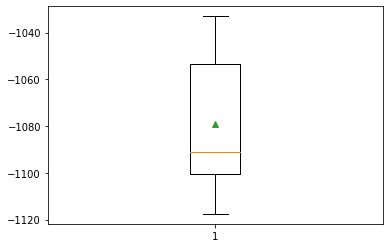

In [162]:
pyplot.boxplot(scores, showmeans=True)
pyplot.show()
#RMSE median is 1090secs with mean RMSE of 1080secs for this crude basic LR model.

In [163]:
#Feature selection: Elastic net
#I should use this model with grid search to fine tune the error score.
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(hist_train4_new_processed2, y_duration)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
scores_elastic = cross_val_score(elastic_net, hist_train4_new_processed2, y_duration, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

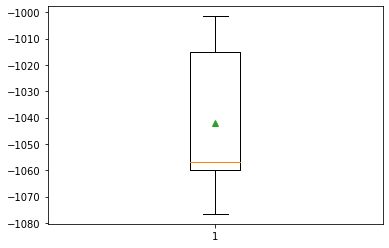

In [165]:
pyplot.boxplot(scores_elastic, showmeans=True)
pyplot.show()
#at 1060, it s only slightly better than the LR.


### Comment on 'naive' models
- The tree-based XGBoost ensemble learning is slightly better than the LR model but not good enough. An error of 1060 seconds is too close to the mean duration of 2861 seconds
##### Next step is to do more feature selection and use some ensembles 

In [166]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

In [167]:
rgrs = ExtraTreesRegressor(n_estimators=100)

In [168]:
rgrs = rgrs.fit(hist_train4_noY, y_duration)

In [169]:
rgrs.feature_importances_

array([0.04631813, 0.06976456, 0.0440508 , 0.04108484, 0.09065056,
       0.04343151, 0.06084239, 0.06522733, 0.08818872, 0.06710423,
       0.11935308, 0.01494154, 0.1214127 , 0.06270192, 0.06492768])

In [170]:
model = SelectFromModel(rgrs, prefit=True)

In [171]:
X_new = model.transform(hist_train4_noY)
X_new.shape

(188624, 6)

In [172]:
X_new

array([[1845, 3441.0, 33.0, 14.0, 21.0, 861.0],
       [5477, 1900.0, 1.0, 2.0, 2.0, 690.0],
       [5477, 4771.0, 8.0, 6.0, 18.0, 289.0],
       ...,
       [2956, 1836.0, 39.0, 41.0, 40.0, 795.0],
       [3630, 1175.0, 7.0, 7.0, 12.0, 384.0],
       [3630, 2605.0, 20.0, 20.0, 23.0, 134.0]], dtype=object)

In [173]:
hist_train4_noY.head()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_wk_day,store_pri_cat_recode_num
0,1.0000,1845,1.0000,4.0000,3441.0000,4.0000,557.0000,1239.0000,33.0000,14.0000,21.0000,446.0000,861.0000,4,1
1,2.0000,5477,2.0000,1.0000,1900.0000,1.0000,1400.0000,1400.0000,1.0000,2.0000,2.0000,446.0000,690.0000,1,23
8,2.0000,5477,3.0000,4.0000,4771.0000,3.0000,820.0000,1604.0000,8.0000,6.0000,18.0000,446.0000,289.0000,0,17
14,1.0000,2841,1.0000,1.0000,1525.0000,1.0000,1525.0000,1525.0000,5.0000,6.0000,8.0000,446.0000,795.0000,3,18
15,1.0000,2841,1.0000,2.0000,3620.0000,2.0000,1425.0000,2195.0000,5.0000,5.0000,7.0000,446.0000,205.0000,1,18


### Final Selected Features
Comparing the hist_train4_noY dataset with the full predictors with the newly generated features using the ExtraTrees;

- we have reduced the features to the following 5 features:
**store_id, subtotal, total_onshift_dashers, total_outstanding_orders, estimated_store_to_consumer_driving_duration
Do these features make sense visually? Despite column transformation there is no significant correlation (>0.5)

* Next steps. I will subset the predictors to just these selected ones and run my final model with them after preprocessing them.

#### Duration and Subtotal
<img scrc=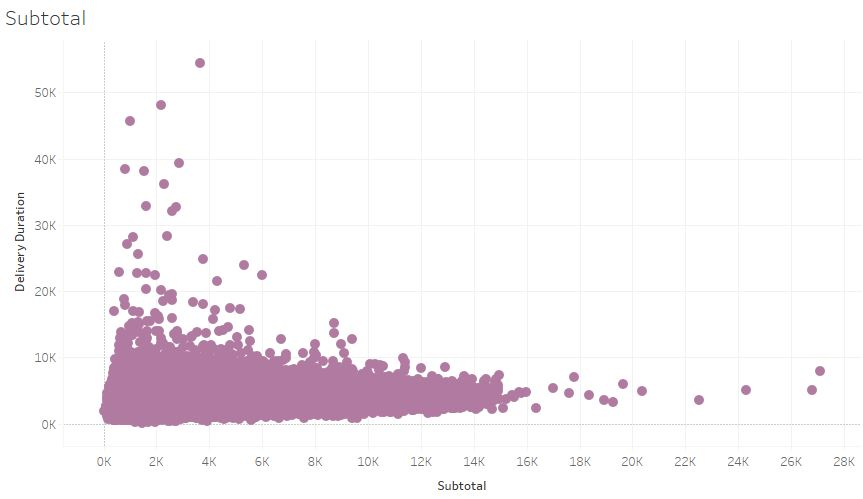 width="800" height="200>

#### Delivery duration and Store-to-consumer-duration
<img scrc=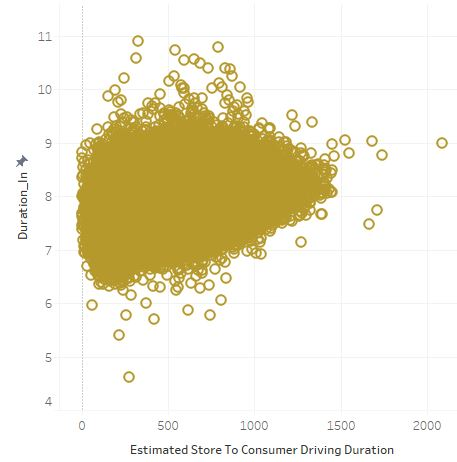 width="800" height="200>

#### Delivery duration and total-onshift-dashers
<img scrc=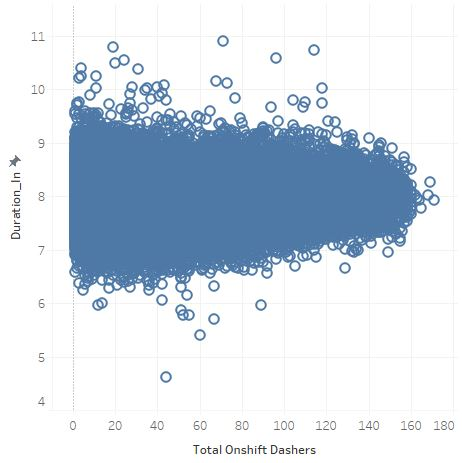 width="800" height="200>

#### Delivery duration and Total Outstanding orders
<img scrc=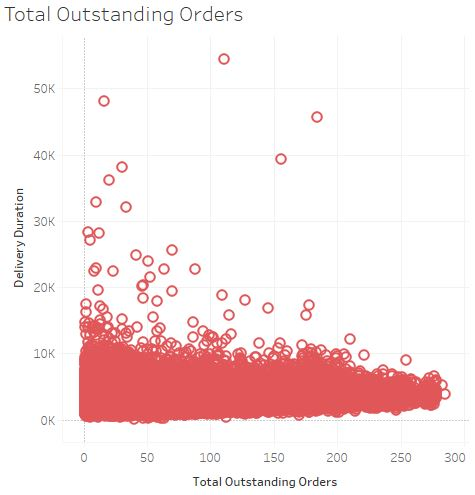 width="800" height="200>

In [174]:
#Naive model with newly generated features.
scores_new = cross_val_score(lin_reg, X_new, y_duration, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

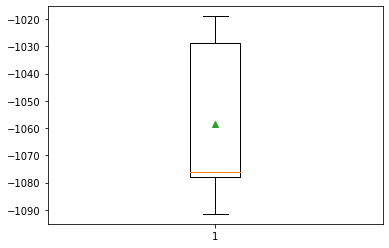

In [175]:
pyplot.boxplot(scores_new, showmeans=True)
pyplot.show()

#With preprocessing preprocessing the RMSE score reduced from 1090 to 1080.

### Preprocessing Final Features and fitting models

In [176]:
import xgboost

In [177]:
xgb_reg = xgboost.XGBRegressor()

In [178]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=7)

C:\Users\olani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [179]:
#XGBoost fit using new training set without scaling or OHE
scores_xgb = cross_val_score(xgb_reg, X_new, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

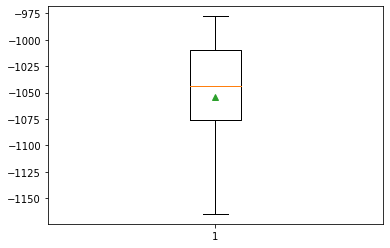

In [182]:
pyplot.boxplot(scores_xgb, showmeans=True)
pyplot.show()

#Without preprocessing the RMSE score reduced from 1090 to 1040. And importantly the mean is closer to the median
#This shows the predicted values are normally distributed which is better for prediction.
#RMSE of 1030 is still quite high given a mean of actual = 2861

### To make XGBoost better:
- Preprocess the training set.

In [183]:
hist_train4_new_noY = hist_train4_noY.copy()

In [184]:
hist_train4_new_noY.head()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_wk_day,store_pri_cat_recode_num
0,1.0000,1845,1.0000,4.0000,3441.0000,4.0000,557.0000,1239.0000,33.0000,14.0000,21.0000,446.0000,861.0000,4,1
1,2.0000,5477,2.0000,1.0000,1900.0000,1.0000,1400.0000,1400.0000,1.0000,2.0000,2.0000,446.0000,690.0000,1,23
8,2.0000,5477,3.0000,4.0000,4771.0000,3.0000,820.0000,1604.0000,8.0000,6.0000,18.0000,446.0000,289.0000,0,17
14,1.0000,2841,1.0000,1.0000,1525.0000,1.0000,1525.0000,1525.0000,5.0000,6.0000,8.0000,446.0000,795.0000,3,18
15,1.0000,2841,1.0000,2.0000,3620.0000,2.0000,1425.0000,2195.0000,5.0000,5.0000,7.0000,446.0000,205.0000,1,18


In [185]:
X_new1 = hist_train4_new_noY.loc[:, ['store_id', 'subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']]

In [186]:
#sanity check
X_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188624 entries, 0 to 197427
Data columns (total 5 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   store_id                                      188624 non-null  category
 1   subtotal                                      188624 non-null  float64 
 2   total_onshift_dashers                         188624 non-null  float64 
 3   total_outstanding_orders                      188624 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  188624 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 7.9 MB


In [187]:
xgb_reg = xgboost.XGBRegressor()

In [188]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=7)

C:\Users\olani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [189]:
#XGBoost fit using new training set without scaling or OHE
scores_xgb = cross_val_score(xgb_reg, X_new, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

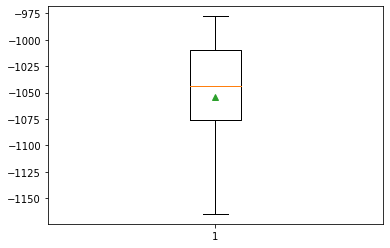

In [191]:
pyplot.boxplot(scores_xgb, showmeans=True)
pyplot.show()

#Without preprocessing the RMSE score reduced from 1090 to 1040. And importantly the mean is closer to the median
#This shows the predicted values are normally distributed which is better for prediction.
#RMSE of 1030 is still quite high given a mean of actual = 2861

In [192]:
X_new1.head()

,store_id,subtotal,total_onshift_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1845,3441.0000,33.0000,21.0000,861.0000
1,5477,1900.0000,1.0000,2.0000,690.0000
8,5477,4771.0000,8.0000,18.0000,289.0000
14,2841,1525.0000,5.0000,8.0000,795.0000
15,2841,3620.0000,5.0000,7.0000,205.0000


In [193]:
X_new1_num2= X_new1[['subtotal', 'total_onshift_dashers', 'total_outstanding_orders','estimated_store_to_consumer_driving_duration']]
X_new1_num2


,subtotal,total_onshift_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,3441.0000,33.0000,21.0000,861.0000
1,1900.0000,1.0000,2.0000,690.0000
8,4771.0000,8.0000,18.0000,289.0000
14,1525.0000,5.0000,8.0000,795.0000
15,3620.0000,5.0000,7.0000,205.0000
...,...,...,...,...
197423,1389.0000,17.0000,23.0000,331.0000
197424,3010.0000,12.0000,14.0000,915.0000
197425,1836.0000,39.0000,40.0000,795.0000
197426,1175.0000,7.0000,12.0000,384.0000


In [194]:
X_new1_cat = X_new1[['store_id']]
X_new1_cat

,store_id
0,1845
1,5477
8,5477
14,2841
15,2841
...,...
197423,2956
197424,2956
197425,2956
197426,3630


In [195]:
#One hot encoder to recode the levels of the categorical variables
cat_encoder = OneHotEncoder()

In [196]:
X_new1_cat_ohe = cat_encoder.fit_transform(X_new1_cat)

In [197]:
#Let s check the sparse matrix
X_new1_cat_ohe

<188624x6554 sparse matrix of type '<class 'numpy.float64'>'
	with 188624 stored elements in Compressed Sparse Row format>

In [198]:
#pipelines constructor instead
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
X_new1_num2_tr = num_pipeline.fit_transform(X_new1_num2)

In [199]:
#List of attributes
num_attribs= list(X_new1_num2)
cat_attribs = list(X_new1_cat)

In [200]:
full_pipeline_new1 = ColumnTransformer([
    ('numerical', StandardScaler(), num_attribs),
    ('categorical', OneHotEncoder(), cat_attribs),
])

In [201]:
X_new1_processed = full_pipeline_new1.fit_transform(X_new1)

In [202]:
#Processed dataset ready for model fit
X_new1_processed

<188624x6558 sparse matrix of type '<class 'numpy.float64'>'
	with 943120 stored elements in Compressed Sparse Row format>

### Model fit: Feature selected, standardized, OHE instances

The approach here:
- is to ensure there are no NAs in the train and test sets;
- encode the categorical variables, which results in sparse matrix
- Standardize the numerical variables. This is crucial for Linear and KNN but not a huge deal for tree based algorithms.
- Instead of getting a validate set out of training instances provided, I use KFold cross-validation to obtain Root Mean Squared Error.

*Note:
- please read the conclusion before proceeding to better understand this section.

In [203]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=7)

C:\Users\olani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [204]:
#try linear regression and see what happens

lin_reg = LinearRegression()
#model_new = lin_reg.fit(hist_train4_new_processed2, y_duration)


In [205]:
scores_lr = cross_val_score(lin_reg, X_new1_processed, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

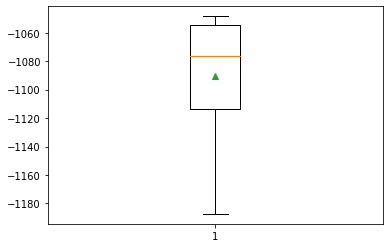

In [206]:
pyplot.boxplot(scores_lr, showmeans=True)
pyplot.show()

#With preprocessing the RMSE score is 1080 seconds and which is quite high given a mean of actual = 2861 seconds.
#it couldn't beat its own record

In [207]:
xgb_reg = xgboost.XGBRegressor()

In [208]:
#XGBoost fit using new training set without scaling or OHE
scores_xgb_xnew = cross_val_score(xgb_reg, X_new1_processed, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

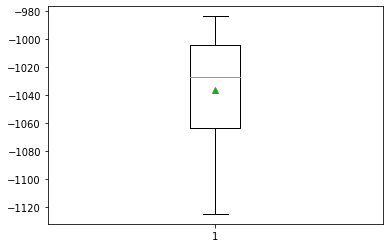

In [209]:
pyplot.boxplot(scores_xgb_xnew, showmeans=True)
pyplot.show()

#With preprocessing feature selective data set, the RMSE score reduced from 1080 in LR to 1030. And importantly the mean is closer to the median
#This shows the predicted values are normally distributed which is better for prediction.
#RMSE of 1030 seconds is still quite high given a mean of actual = 2861

## Performance on test set.

In [211]:
test_pred = pred_test.copy()
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   store_primary_category                        53435 non-null  object 
 4   order_protocol                                54495 non-null  float64
 5   total_items                                   54778 non-null  int64  
 6   subtotal                                      54778 non-null  int64  
 7   num_distinct_items                            54778 non-null  int64  
 8   min_item_price                                54778 non-null  int64  
 9   max_item_price                                54778 non-null 

### About the Test Set:
- NAs are found, extra attributes not found in the training.
- We will apply these cleaning and transformations as we did for training.

In [213]:
#Distinct count of level numbers. 
uniq_check = hist_train1["store_id"].value_counts()
len(uniq_check)

6743

In [214]:
#All the stores are not represented in the test set.
#We will proceed with other cleaning tasks.
uniq_checknew = test_pred["store_id"].value_counts()
len(uniq_checknew)

5676

Drop columns that were not used to fit the training set.

In [216]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   store_primary_category                        53435 non-null  object 
 4   order_protocol                                54495 non-null  float64
 5   total_items                                   54778 non-null  int64  
 6   subtotal                                      54778 non-null  int64  
 7   num_distinct_items                            54778 non-null  int64  
 8   min_item_price                                54778 non-null  int64  
 9   max_item_price                                54778 non-null 

In [219]:
#Remove columns that are recoded.
test_pred.drop(columns=['market_id', 'created_at', 'store_primary_category', 'order_protocol', 'total_items', 
                        'num_distinct_items','min_item_price', 'max_item_price', 'total_busy_dashers',
                       'estimated_order_place_duration', 'delivery_id', 'platform'], inplace =True)

test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   store_id                                      54778 non-null  int64  
 1   subtotal                                      54778 non-null  int64  
 2   total_onshift_dashers                         50145 non-null  float64
 3   total_outstanding_orders                      50145 non-null  float64
 4   estimated_store_to_consumer_driving_duration  54767 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.1 MB


In [217]:
X_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188624 entries, 0 to 197427
Data columns (total 5 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   store_id                                      188624 non-null  category
 1   subtotal                                      188624 non-null  float64 
 2   total_onshift_dashers                         188624 non-null  float64 
 3   total_outstanding_orders                      188624 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  188624 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 7.9 MB


In [220]:
test_pred['store_id'] = test_pred['store_id'].astype('category')

In [221]:
test_pred['subtotal'] = test_pred['subtotal'].astype('float64')

In [222]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   store_id                                      54778 non-null  category
 1   subtotal                                      54778 non-null  float64 
 2   total_onshift_dashers                         50145 non-null  float64 
 3   total_outstanding_orders                      50145 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  54767 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 2.0 MB


In [226]:
#Values below zero are assumed to input errors and should be removed in this case.
s1 = (test_pred['total_onshift_dashers'] < 1)

In [227]:
test_pred.loc[s1, 'total_onshift_dashers'] = np.nan

In [230]:
#Values below zero are assumed to input errors and should be removed in this case.
s2 = (test_pred['total_outstanding_orders'] < 1)

In [231]:
test_pred.loc[s2, 'total_outstanding_orders'] = np.nan

In [234]:
#Values below zero are assumed to input errors and should be removed in this case.
s3 = (test_pred['estimated_store_to_consumer_driving_duration'] < 1)

In [235]:
test_pred.loc[s3, 'estimated_store_to_consumer_driving_duration'] = np.nan

In [238]:
#Values below zero are assumed to input errors and should be removed in this case.
s4 = (test_pred['subtotal'] < 1)

In [239]:
test_pred.loc[s4, 'subtotal'] = np.nan

In [240]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   store_id                                      54778 non-null  category
 1   subtotal                                      54719 non-null  float64 
 2   total_onshift_dashers                         49225 non-null  float64 
 3   total_outstanding_orders                      49107 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  54765 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 2.0 MB


In [241]:
test_pred_num= test_pred[['subtotal', 'total_onshift_dashers', 'total_outstanding_orders','estimated_store_to_consumer_driving_duration']]
test_pred_num.describe()


,subtotal,total_onshift_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,54719.0000,49225.0000,49107.0000,54765.0000
mean,2718.6870,49.9934,63.8902,547.7854
std,1896.8454,37.3352,56.2242,220.4389
min,5.0000,1.0000,1.0000,1.0000
25%,1420.0000,20.0000,20.0000,385.0000
50%,2223.0000,41.0000,46.0000,544.0000
75%,3415.0000,72.0000,92.0000,703.0000
max,29925.0000,175.0000,292.0000,1550.0000


In [242]:
test_pred_cat = test_pred[['store_id']]
test_pred_cat

,store_id
0,5477
1,5477
2,5477
3,5477
4,2841
...,...
54773,2956
54774,2956
54775,2956
54776,2956


In [246]:
#One hot encoder to recode the levels of the categorical variables
cat_encoder = OneHotEncoder()

In [247]:
test_pred_cat_ohe = cat_encoder.fit_transform(test_pred_cat)

In [248]:
#Let s check the sparse matrix
test_pred_cat_ohe

<54778x5676 sparse matrix of type '<class 'numpy.float64'>'
	with 54778 stored elements in Compressed Sparse Row format>

In [249]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [252]:
#pipelines constructor to replace NAs with Median and standardize the instances
num_pipeline3 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])
#X_new1_num2_tr = num_pipeline.fit_transform(X_new1_num2)

In [253]:
#List of attributes
num_attribs= list(test_pred_num)
cat_attribs = list(test_pred_cat)

In [254]:
full_pipeline_new3 = ColumnTransformer([
    ('numerical', num_pipeline3, num_attribs),
    ('categorical', OneHotEncoder(), cat_attribs),
])

In [255]:
test_pred_processed = full_pipeline_new3.fit_transform(test_pred)

In [256]:
#Processed dataset ready for model fit
test_pred_processed

<54778x5680 sparse matrix of type '<class 'numpy.float64'>'
	with 273890 stored elements in Compressed Sparse Row format>

### Adopted model:
#### Gradient Boosting ensemble learning
Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting the error its predecessor.

- Extreme Gradient Boosting (XGBoost) with default learning parameters. Well optimized and faster.

- Gradient Tree Boosting/Gradient Boosted Regression Trees (GBRT).
    - Iterative hyperparmeter values, evaluated on RMSE.

In [259]:
xgb_reg1 = xgboost.XGBRegressor()

In [260]:
xgb_reg.fit(X_new1_processed, y_duration)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
#The predict call yielded 'feature mismatch error' so did not work.
#y_predict = xgb_reg.predict(test_pred_processed)

*I am switching over to gradientboostingregessor()

In [299]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=150, learning_rate=0.5)


In [287]:
gbrt.fit(X_new1_processed, y_duration)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [308]:
#Sanity checks
X_new1.shape, y_duration.shape

((188624, 5), (188624,))

In [288]:
cv = KFold(n_splits=10, random_state=7)

C:\Users\olani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [289]:
scores_gb = cross_val_score(gbrt, X_new1_processed, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

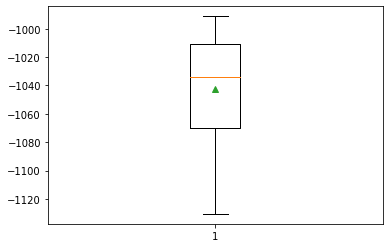

In [290]:
pyplot.boxplot(scores_gb, showmeans=True)
pyplot.show()

#With preprocessing the RMSE score is 1030 seconds and which is quite high given a mean of actual = 2861 seconds.
#it couldn't beat its own record

In [ ]:
#The predict call yielded 'feature mismatch error' so did not work.
#y_predict = gbrt.predict(test_pred_processed)

#### Using Train set unprocessed
*This worked and my reported predict() call came from here.

In [300]:
from sklearn.ensemble import GradientBoostingRegressor
#stochastic Gradient Boosting. Using the random 30% subsampling technique to speed up training
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=150, learning_rate=0.5)


In [301]:
#Train set is the selected features in the train set without One Hot Encoding and Standardization.
gbrt1.fit(X_new1, y_duration)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [323]:
scores_gb1 = cross_val_score(gbrt1, X_new1, y_duration, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

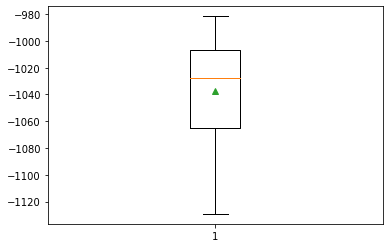

In [303]:
pyplot.boxplot(scores_gb1, showmeans=True)
pyplot.show()

#Without preprocessing the RMSE score is <1030 seconds and which is quite high given a mean of actual = 2861 seconds.
#it couldn't beat its own record

- Due to 'feature mismatch error' while calling predict() method:
- I switched to datasets version that were not preprocessed. So at least I ll deal with NAs in the test set prior to calling predict()
- I believe the error has to do with the number of new 'features' generated by the dummy variable(OHE), if so. I think the levels of StoreID attribute is training set is different from that of Test set.
- I ran out of time and could not investigate this issue further.
- I fit the datasets version that were not preprocessed into the Gradient Boosting ensemble learning and it agrees well with the result fit on the processed data.  

Prepare the Test set for the latest fit.

In [294]:
test_pred2 = test_pred.copy()

In [295]:
test_pred2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   store_id                                      54778 non-null  category
 1   subtotal                                      54719 non-null  float64 
 2   total_onshift_dashers                         49225 non-null  float64 
 3   total_outstanding_orders                      49107 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  54765 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 2.0 MB


In [296]:
# drop rows with missing values,
#worked great
test_pred2.dropna(inplace=True)

In [297]:
test_pred2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48997 entries, 0 to 54777
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   store_id                                      48997 non-null  category
 1   subtotal                                      48997 non-null  float64 
 2   total_onshift_dashers                         48997 non-null  float64 
 3   total_outstanding_orders                      48997 non-null  float64 
 4   estimated_store_to_consumer_driving_duration  48997 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 2.2 MB


In [304]:
#Yay! it worked.
y_predict = gbrt1.predict(test_pred2)

In [322]:
#Mean and median ofthe predicted duration.
y_predict_mean, y_predict_median = y_predict.mean(), np.median(y_predict)
y_predict_mean, y_predict_median

(2830.205679914802, 2781.7493590959866)

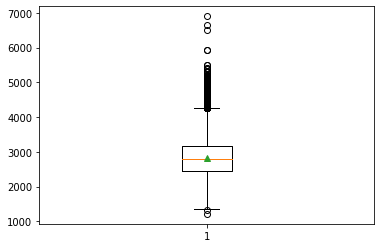

In [310]:
pyplot.boxplot(y_predict, showmeans=True)
pyplot.show()

#Mean of the actual duration is 2861 seconds. Predicted mean = 2830 which is too good to be true.

## Conclusion
#### About the model fit to training set:
In my opinion, the most reliable prediction that can be useful for scaling and production will be obtained with an RMSE much lower than 200 seconds given the mean 2861 seconds.
This will reduce the scatter index to acceptable level of <5%.
Both tree based and Linear regression models resulted in RMSE greater than 1000 seconds. In my experience, there is no amount to hyperparameter tuning that will reduce the RMSE to the desired level of <200 seconds.
Therefore we need to consult with the subject matter experts on the source of the data as well as if better attributes can be obtained.

#### About the prediction done on the test set:
The final machine learning model predicted a mean and median delivery duration of 2830 seconds and 2782 seconds, respectively on the previously unseen test set (right boxplot below). These values are remarkably close to the mean and median of the historical delivery duration, which should be a good result, but they warrant further investigation.

#### Hyperparameter the tuning
I could have use GridSearchCV to find the better hyperparameter values for the gradient boost but time constraint did not allow me to fine tune my model.

## APPENDIX

#### Feature selection using Recursive Feature Elimination
- Attempt

In [324]:
# define dataset
# get the dataset
def get_dataset():
    X, y = hist_train4_new_noY, y_duration
    return X, y

In [325]:
# get a list of models to evaluate
rfe = RFECV(estimator=DecisionTreeRegressor())


In [326]:
def get_models():
    models = dict()
    #lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
    model = DecisionTreeRegressor()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=7)
    model = DecisionTreeRegressor()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=7)
    model = DecisionTreeRegressor()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=7)
    model = DecisionTreeRegressor()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=7)
    model = DecisionTreeRegressor()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [327]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    return scores

In [328]:
# define dataset
X, y = get_dataset()

In [329]:
# get the models to evaluate
models = get_models()

In [331]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr nan (nan)
>per nan (nan)
>cart -1026.208 (12.157)


KeyboardInterrupt: 

In [ ]:
## End of the exercise. 